<a href="https://colab.research.google.com/github/Ravi-Rsankar/datascience-base/blob/main/machine_learning/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [ ]:
# Simulated asset data (Temperature, Vibration, Pressure)
data = pd.DataFrame({
    'Temperature': [50, 75, 90, 48, 92, 65, 85, 55, 80, 95],
    'Vibration': [5, 20, 30, 4, 35, 12, 28, 7, 22, 38],
    'Pressure': [1000, 1500, 2000, 950, 2100, 1300, 1900, 1100, 1700, 2200]
})

print(data.head())  # View first few rows

   Temperature  Vibration  Pressure
0           50          5      1000
1           75         20      1500
2           90         30      2000
3           48          4       950
4           92         35      2100


In [ ]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

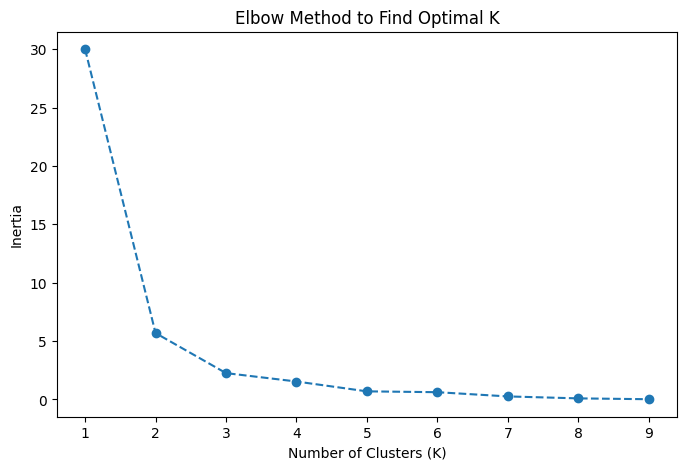

In [ ]:
# Try different values of K (number of clusters)
inertia = []
K_range = range(1, 10)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)  # Store sum of squared distances

# Plot Elbow Curve
plt.figure(figsize=(8,5))
plt.plot(K_range, inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method to Find Optimal K')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(data_scaled)

In [ ]:
print(data.groupby('Cluster').mean())  # See what each group looks like

         Temperature  Vibration     Pressure
Cluster                                     
0          51.000000   5.333333  1016.666667
1          90.500000  32.750000  2050.000000
2          73.333333  18.000000  1500.000000


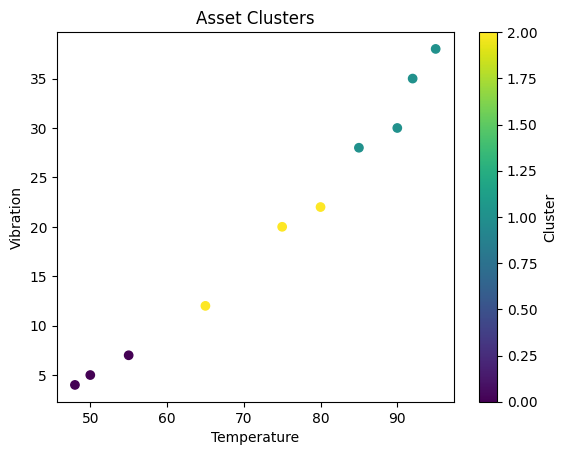

In [ ]:
plt.scatter(data['Temperature'], data['Vibration'], c=data['Cluster'], cmap='viridis')
plt.xlabel('Temperature')
plt.ylabel('Vibration')
plt.title('Asset Clusters')
plt.colorbar(label='Cluster')
plt.show()